In [1]:
import cortex
import numpy as np

In [2]:
subject, xfm = 'AA', '20180905AA-sg-auto'
#subject, xfm = 'AHfs', '20180816AH-sg'
mask = cortex.db.get_mask(subject, xfm)

#### Functional

In [4]:
# choose functional roi 
roi = 'AC'
# get 3d mask of voxels that belong to roi
roi_mask = cortex.utils.get_roi_masks(subject, xfm, roi_list = [roi], gm_sampler = 'cortical', split_lr = False, threshold = None, return_dict = True)[roi]
# get indices of roi voxels in cortical map
roi_vox = np.where(roi_mask[np.where(mask)])[0]

# 'mask' is a 3D boolean array indicating which voxels are part of the brain for this subject, 
# 'roi_mask' is a 1D array with the same length as 'mask', True values are voxels within the ROI
# 'roi_vox' gets the indices of the ROI voxels

Cutting 0 overlapping voxels (should be < ~50)


In [5]:
print(roi_vox[:5])

[4964 4972 6554 6560 6561]


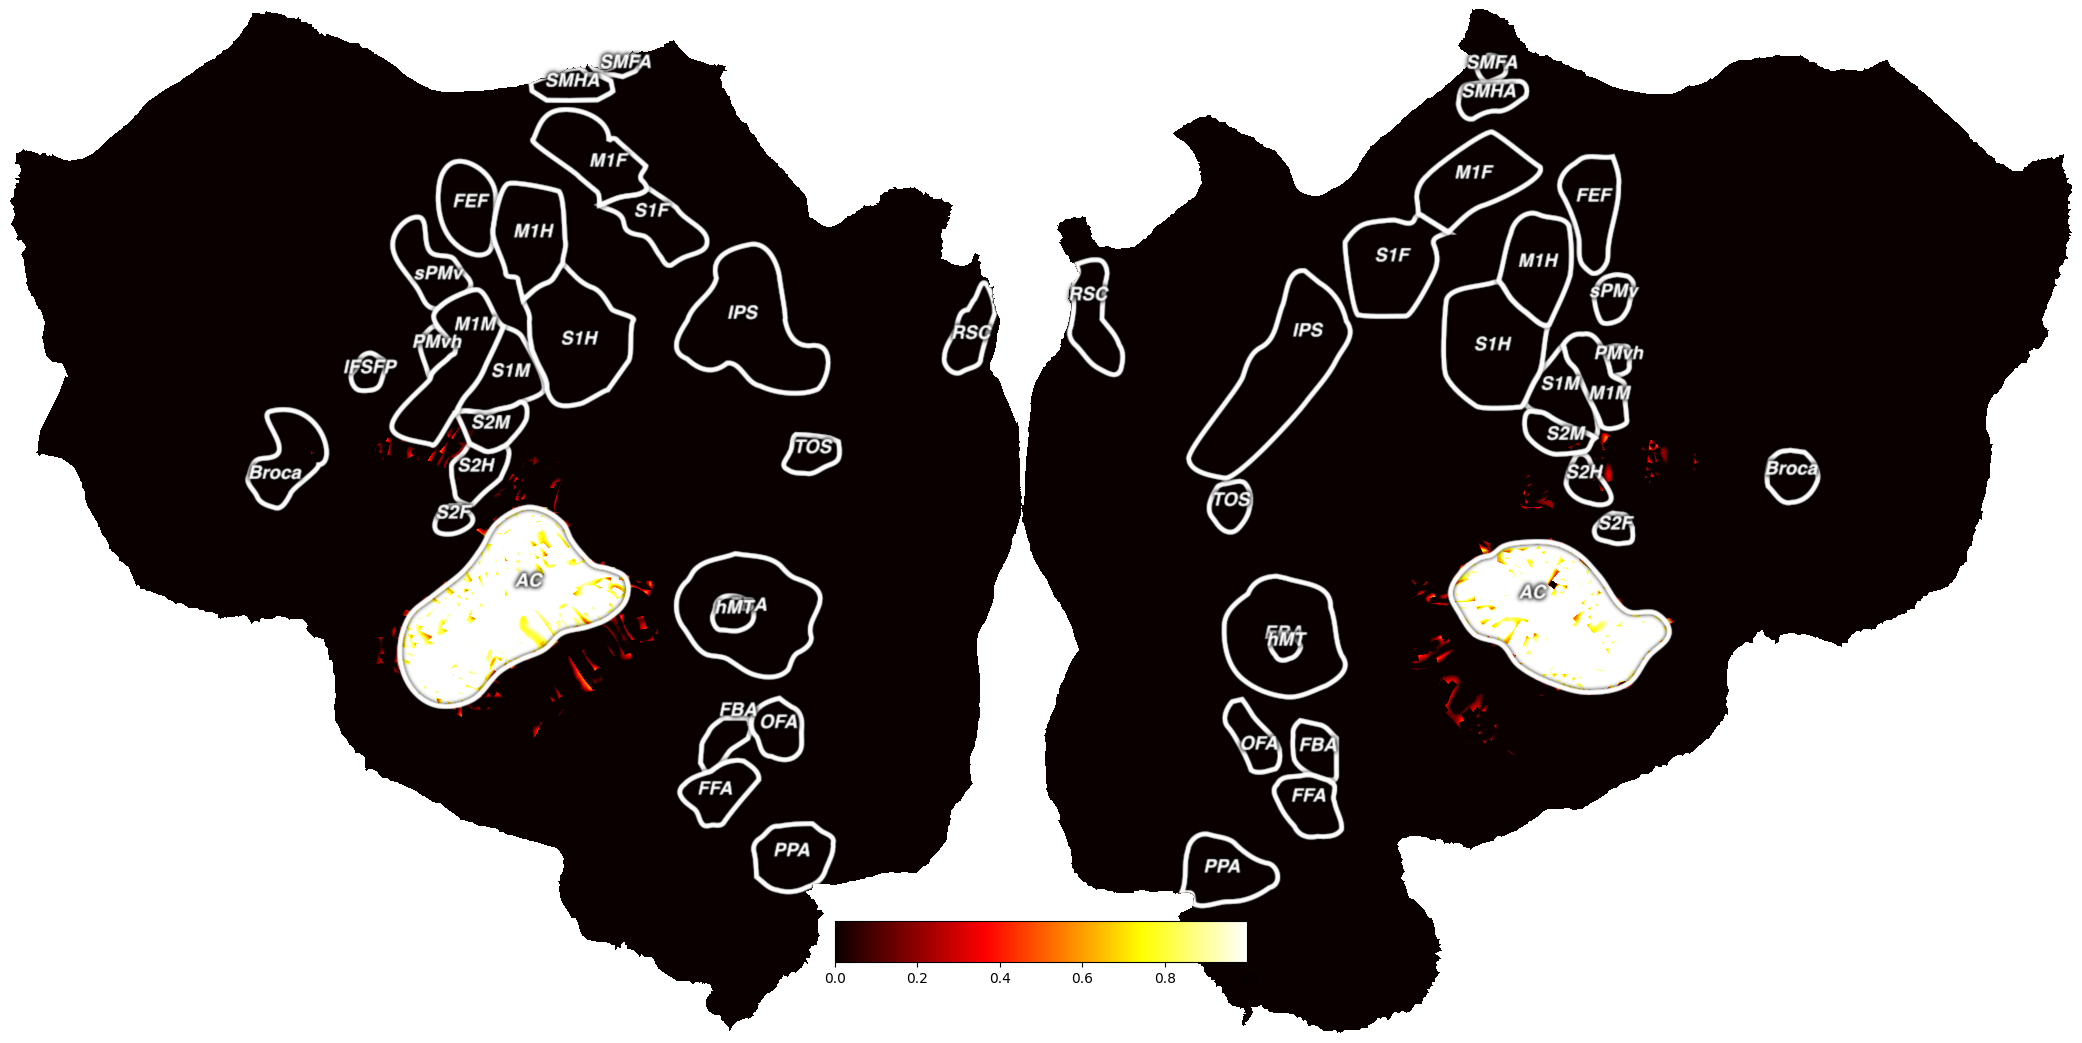

In [5]:
# plot roi voxels
fm = np.zeros(np.sum(mask))
fm[roi_vox] = 1
data_3d = cortex.unmask(mask, fm)
data_vol = cortex.Volume(data_3d, subject, xfm, cmap='hot', vmin=0, vmax=1)
#cortex.quickshow(data_vol, with_labels=True, with_rois=True, linewidth=5, thick=1);
plot = cortex.quickshow(data_vol, with_labels=True, with_rois=True, linewidth=5)

#### Anatomical

##### one ROI

In [15]:
#%cd 'data/rois'
# choose anatomical roi (https://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation)
roi = 'parsopercularis'  
# load anatomical roi
roi_vox = np.load('%s_roi.npy' % subject, allow_pickle = True).item()[roi]

In [39]:
# plot roi voxels
fm = np.zeros(np.sum(mask))
fm[roi_vox] = 1
data_3d = cortex.unmask(mask, fm)
data_vol = cortex.Volume(data_3d, subject, xfm, cmap='hot', vmin=0, vmax=1)
#cortex.quickshow(data_vol, with_labels=True, with_rois=True, linewidth=5, thick=1);
cortex.quickshow(data_vol, with_labels=True, with_rois=True, linewidth=5);

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

##### multiple ROIs

In [49]:
roi = ['parsopercularis','parstriangularis','superiorfrontal','rostralmiddlefrontal','caudalmiddlefrontal','frontalpole','precuneus']
roi_data = np.load(f'{subject}_roi.npy', allow_pickle=True).item()
roi_vox = {}
for region in roi:
    roi_vox[region] = roi_data[region]

In [50]:
len(roi_vox)
for key, value in roi_vox.items():
    print(f"{key}: {len(value)} items")

parsopercularis: 1302 items
parstriangularis: 1293 items
superiorfrontal: 5978 items
rostralmiddlefrontal: 4584 items
caudalmiddlefrontal: 1873 items
frontalpole: 259 items
precuneus: 2915 items


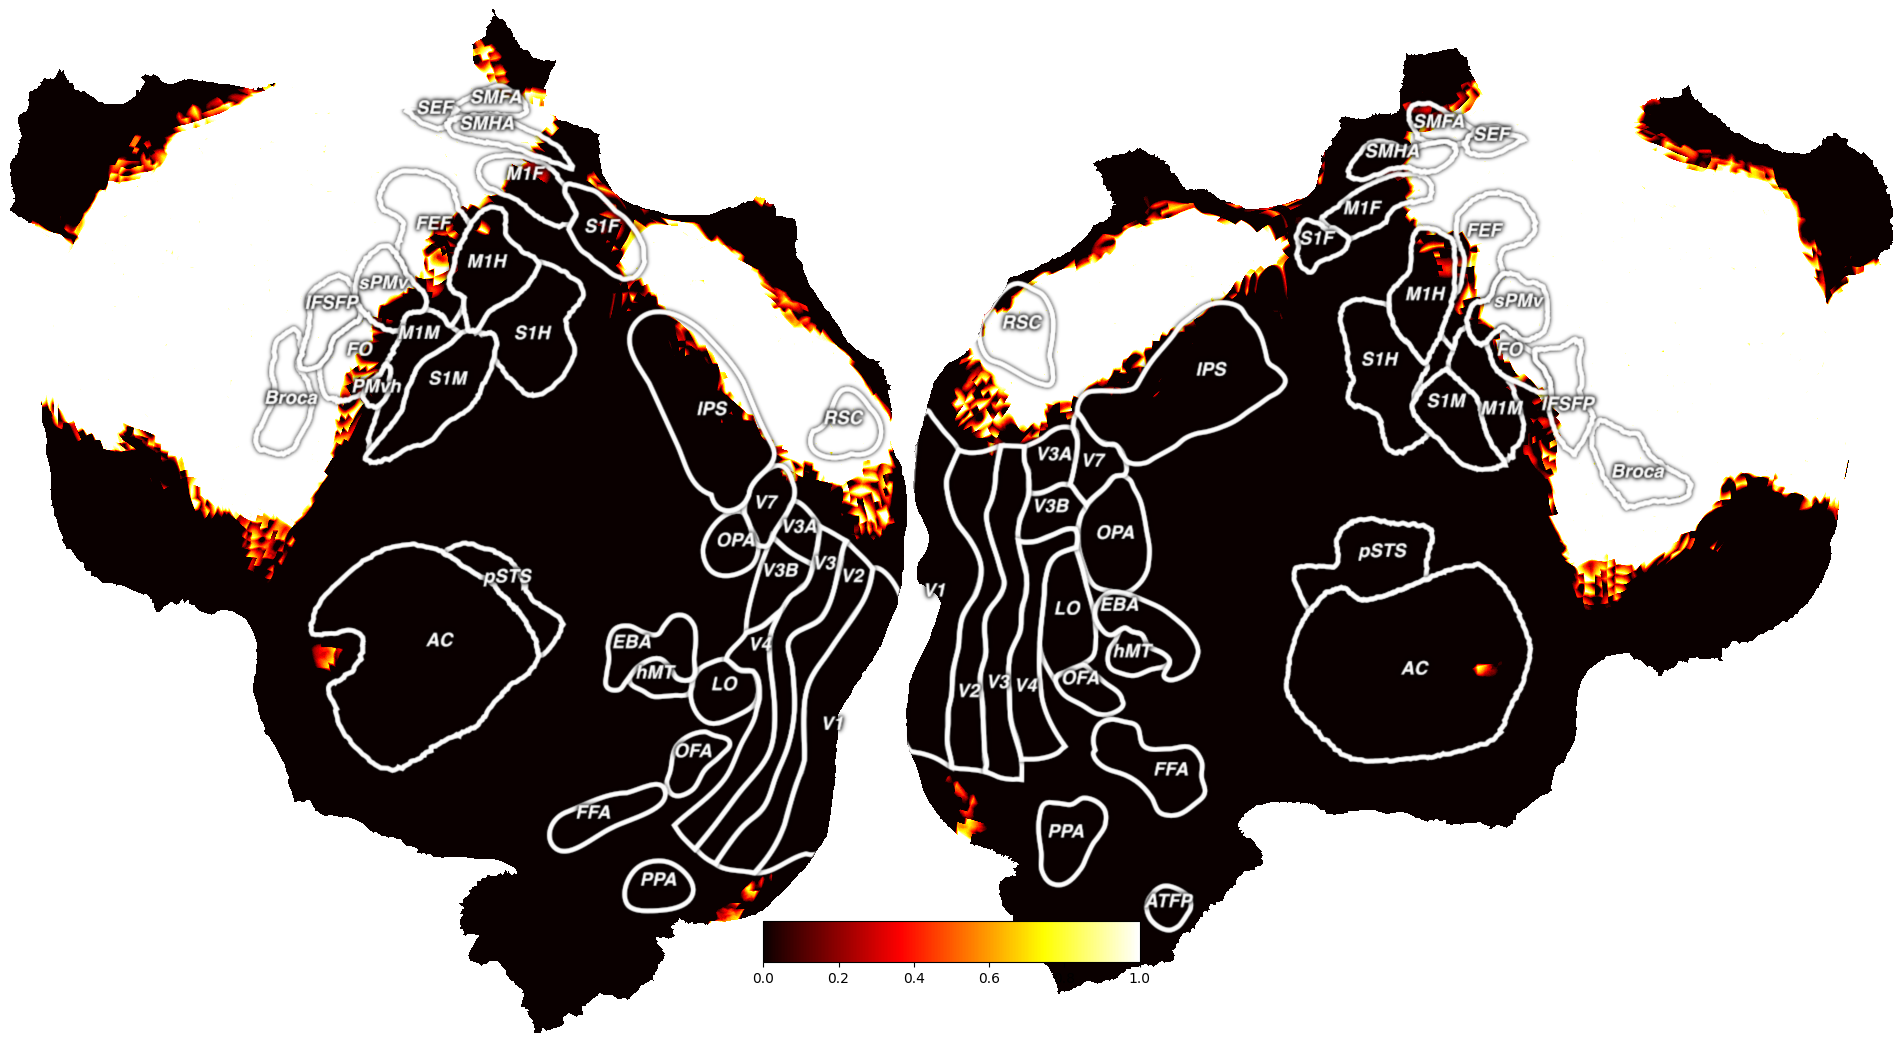

In [51]:
fm = np.zeros(np.sum(mask))
for region in roi_vox:
    voxs = roi_vox[region]
    fm[voxs] = 1
data_3d = cortex.unmask(mask,fm)
data_vol = cortex.Volume(data_3d, subject, xfm, cmap='hot', vmin=0, vmax=1)
cortex.quickshow(data_vol, with_labels=True, with_rois=True, linewidth=5);